In [1]:
#import numpy as np

#from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import fasttext
import pickle

In [5]:
model = fasttext.skipgram('OpenNMT-py/data/C/all_data.txt', 'emb_model')
print(model.words) # list of words in dictionary

{'84', '53', '47', '68', '45', '86', '5', '46', '39', '50', '7', '65', '11', '12', '70', '29', '66', '41', '</s>', '76', '38', '49', '67', '6', '16', '83', '15', '82', '54', '31', '51', '18', '63', '88', '80', '8', '36', '37', '57', '81', '85', '71', '89', '10', '35', '79', '40', '59', '48', '4', '91', '75', '1', '43', '14', '42', '52', '2', '61', '69', '78', '60', '74', '0', '72', '77', '55', '44', '58', '25', '9', '56', '20', '73', '19', '3', '33', '62', '64'}


In [7]:
len(model['84'])

100

In [24]:
with open('../../data/C/txt/dur2tok.pkl', 'rb') as f:
    dur_to_tok = pickle.load(f)
tok_to_dur = {v:k for k, v in dur_to_tok.items()}

In [19]:
len(dur_to_tok)

44

In [32]:
dur_to_tok

{'num_classes': 43,
 '0.25': 0,
 '0.5': 1,
 '1.0': 2,
 '0.0': 3,
 '1/6': 4,
 '1/12': 5,
 '0.75': 6,
 '2.75': 7,
 '3.0': 8,
 '1.5': 9,
 '2.25': 10,
 '1/3': 11,
 '4.0': 12,
 '5/3': 13,
 '3.25': 14,
 '1.25': 15,
 '2.0': 16,
 '20.0': 17,
 '1.75': 18,
 '6.0': 19,
 '3.75': 20,
 '8.0': 21,
 '3.5': 22,
 '17/3': 23,
 '8.5': 24,
 '2.5': 25,
 '53.0': 26,
 '4.5': 27,
 '13.0': 28,
 '5/12': 29,
 '4.25': 30,
 '11/12': 31,
 '25/6': 32,
 '23/12': 33,
 '13/6': 34,
 '2/3': 35,
 '9.0': 36,
 '5.0': 37,
 '51.0': 38,
 '14.0': 39,
 '12.0': 40,
 '7.0': 41,
 '30.0': 42}

In [25]:
tok_to_dur

{43: 'num_classes',
 0: '0.25',
 1: '0.5',
 2: '1.0',
 3: '0.0',
 4: '1/6',
 5: '1/12',
 6: '0.75',
 7: '2.75',
 8: '3.0',
 9: '1.5',
 10: '2.25',
 11: '1/3',
 12: '4.0',
 13: '5/3',
 14: '3.25',
 15: '1.25',
 16: '2.0',
 17: '20.0',
 18: '1.75',
 19: '6.0',
 20: '3.75',
 21: '8.0',
 22: '3.5',
 23: '17/3',
 24: '8.5',
 25: '2.5',
 26: '53.0',
 27: '4.5',
 28: '13.0',
 29: '5/12',
 30: '4.25',
 31: '11/12',
 32: '25/6',
 33: '23/12',
 34: '13/6',
 35: '2/3',
 36: '9.0',
 37: '5.0',
 38: '51.0',
 39: '14.0',
 40: '12.0',
 41: '7.0',
 42: '30.0'}

In [43]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.words:
        if word != '</s>' and int(word) < dur_to_tok['num_classes']:
            label = word + ' (' + tok_to_dur[int(word)] + ')'
        else:
            label = word
        #except:
        #    pass
        tokens.append(model[word])
        labels.append(label)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    print(labels)

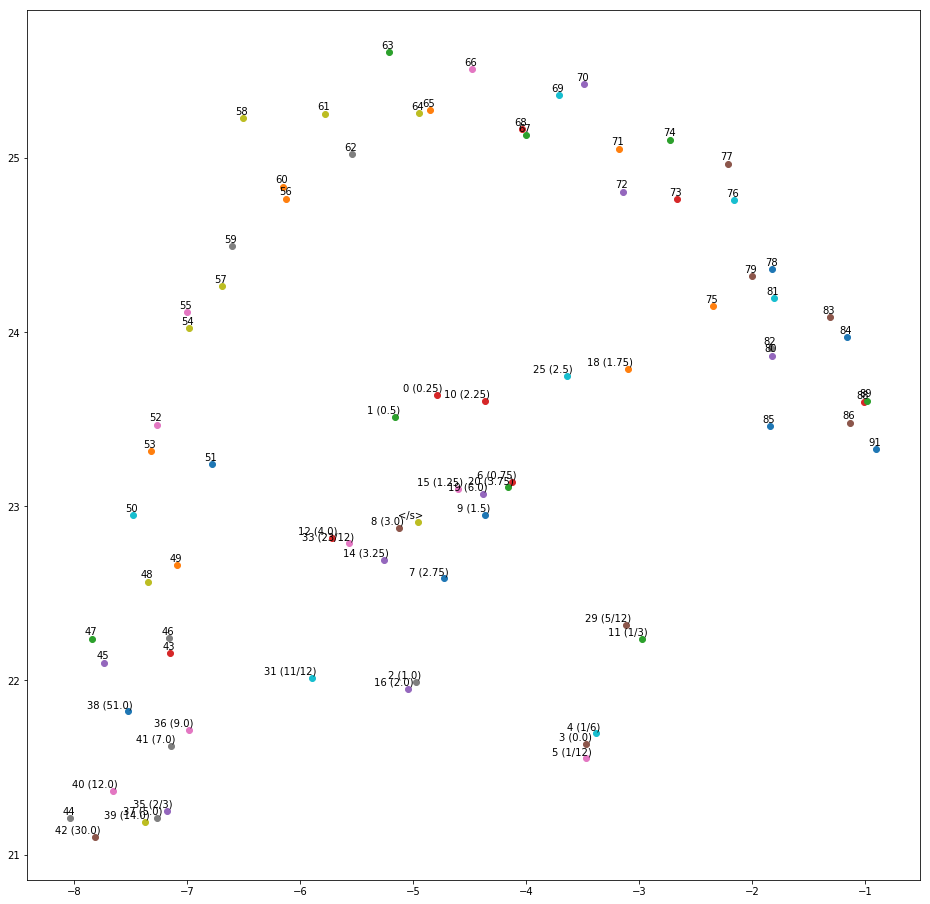

['84', '53', '47', '68', '45', '86', '5 (1/12)', '46', '39 (14.0)', '50', '7 (2.75)', '65', '11 (1/3)', '12 (4.0)', '70', '29 (5/12)', '66', '41 (7.0)', '</s>', '76', '38 (51.0)', '49', '67', '6 (0.75)', '16 (2.0)', '83', '15 (1.25)', '82', '54', '31 (11/12)', '51', '18 (1.75)', '63', '88', '80', '8 (3.0)', '36 (9.0)', '37 (5.0)', '57', '81', '85', '71', '89', '10 (2.25)', '35 (2/3)', '79', '40 (12.0)', '59', '48', '4 (1/6)', '91', '75', '1 (0.5)', '43', '14 (3.25)', '42 (30.0)', '52', '2 (1.0)', '61', '69', '78', '60', '74', '0 (0.25)', '72', '77', '55', '44', '58', '25 (2.5)', '9 (1.5)', '56', '20 (3.75)', '73', '19 (6.0)', '3 (0.0)', '33 (23/12)', '62', '64']


In [44]:
tsne_plot(model)

In [18]:
dur_to_tok

{'num_classes': 43,
 '0.25': 0,
 '0.5': 1,
 '1.0': 2,
 '0.0': 3,
 '1/6': 4,
 '1/12': 5,
 '0.75': 6,
 '2.75': 7,
 '3.0': 8,
 '1.5': 9,
 '2.25': 10,
 '1/3': 11,
 '4.0': 12,
 '5/3': 13,
 '3.25': 14,
 '1.25': 15,
 '2.0': 16,
 '20.0': 17,
 '1.75': 18,
 '6.0': 19,
 '3.75': 20,
 '8.0': 21,
 '3.5': 22,
 '17/3': 23,
 '8.5': 24,
 '2.5': 25,
 '53.0': 26,
 '4.5': 27,
 '13.0': 28,
 '5/12': 29,
 '4.25': 30,
 '11/12': 31,
 '25/6': 32,
 '23/12': 33,
 '13/6': 34,
 '2/3': 35,
 '9.0': 36,
 '5.0': 37,
 '51.0': 38,
 '14.0': 39,
 '12.0': 40,
 '7.0': 41,
 '30.0': 42}